## Importowanie pakietów

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap
from collections import defaultdict
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

## Definicja sieci

In [3]:
# class KohonenNetwork:
#     def __init__(self, M, N, input_dim, initial_sigma=1.0, sigma_decay=1.0, init_lr=0.1, decay_rate=1, neighborhood_function='gaussian'):
#         # Initialization of the network with the given parameters and preparation of weights and cluster map.
#         self.M, self.N, self.input_dim = M, N, input_dim
#         self.initial_sigma, self.sigma_decay = initial_sigma, sigma_decay
#         self.init_lr, self.decay_rate = init_lr, decay_rate
#         self.neighborhood_function = neighborhood_function

#         # Initialize weights to form a rectangle with equal distances
#         x = np.linspace(0, 1, M)
#         y = np.linspace(0, 1, N)
#         xv, yv = np.meshgrid(x, y)
#         self.weights = np.dstack((xv, yv))

#         self.bmu_cluster_map = np.zeros((M, N), dtype=int)

#     def train(self, input_data, num_epochs):
#         # Proces uczenia sieci przez określoną liczbę epok.
#         for epoch in range(num_epochs):
#             sigma = self.initial_sigma * np.exp(-epoch / self.decay_rate) * self.sigma_decay
#             learning_rate = self.init_lr * np.exp(-epoch / self.decay_rate)
            
#             for data_sample in input_data:
#                 # Znajdź BMU i zaktualizuj wagi
#                 self._find_bmu_and_update_weights(data_sample, sigma, learning_rate)
        
#     def accuracy(self, data, labels):
#         correct = 0
#         total = len(data)
        
#         if total == 0:
#             return 0

#         for sample, label in zip(data, labels):
#             bmu = self._find_bmu_and_update_weights(sample, None, None)
#             if self.bmu_cluster_map[bmu] == label:
#                 correct += 1

#         return 100 * correct / total



#     def _neighborhood_function(self, distance, sigma):
#         # Funkcja sąsiedztwa, która oblicza wpływ odległości na aktualizację wag.
#         if self.neighborhood_function == 'gaussian':
#             return np.exp(-distance**2 / (2 * sigma**2))
#         elif self.neighborhood_function == 'mexican_hat':
#             return (1 - (distance**2 / sigma**2)) * np.exp(-distance**2 / (2 * sigma**2))
#         else:
#             raise ValueError(f"Nieznana funkcja sąsiedztwa: {self.neighborhood_function}")



#     def _find_bmu_and_update_weights(self, sample, sigma, lr):
#         # Znalezienie BMU, aktualizacja wag i zwrócenie BMU.
#         distances = np.linalg.norm(self.weights - sample, axis=2)
#         bmu = np.unravel_index(np.argmin(distances), distances.shape)
        
#         if sigma and lr:
#             x, y = np.ogrid[0:self.M, 0:self.N]
#             distance = np.sqrt((x - bmu[0])**2 + (y - bmu[1])**2)
#             influence = self._neighborhood_function(distance, sigma)
#             self.weights += lr * influence[..., np.newaxis] * (sample - self.weights)
        
#         return bmu

    
#     def assign_clusters(self, input_data):
#         # Mapowanie klastrów na podstawie danych wejściowych.
#         cluster_stats = defaultdict(list)

#         for i, data_sample in enumerate(input_data):
#             # Wyszukujemy BMU, przy czym nie aktualizujemy wag
#             best_matching_unit = self._find_bmu_and_update_weights(data_sample, None, None)
#             self.bmu_cluster_map[best_matching_unit] = i



#     def display_clustered_data(self, input_data, neuron_positions=True):
#         # Wizualizacja sklastrowanych danych wejściowych.
#         assigned_clusters = np.array([self.bmu_cluster_map[self._find_bmu_and_update_weights(sample, None, None)] for sample in input_data])
#         distinct_clusters = np.unique(assigned_clusters)
#         color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d' if input_data.shape[1] == 3 else None)

#         # Wyświetlanie danych wejściowych sklastrowanych
#         for i, cluster in enumerate(distinct_clusters):
#             cluster_mask = assigned_clusters == cluster
#             if input_data.shape[1] == 3:
#                 ax.scatter(input_data[cluster_mask, 0], input_data[cluster_mask, 1], input_data[cluster_mask, 2], color=color_map(i), edgecolors='k', s=50, label=f'Klaster {i}')  # Use i for cluster number
#             else:
#                 ax.scatter(input_data[cluster_mask, 0], input_data[cluster_mask, 1], color=color_map(i), edgecolors='k', s=50, label=f'Klaster {i}')  # Use i for cluster number

#         if neuron_positions:
#             # Dodanie pozycji neuronów
#             neuron_positions = np.array([self.weights[i, j, :] for i in range(self.M) for j in range(self.N)])
#             if input_data.shape[1] == 3:
#                 ax.scatter(neuron_positions[:, 0], neuron_positions[:, 1], neuron_positions[:, 2], color='red', edgecolors='k', s=100, marker='o', label='Neurony')
#             else:
#                 ax.scatter(neuron_positions[:, 0], neuron_positions[:, 1], color='red', edgecolors='k', s=100, marker='o', label='Neurony')

#         ax.set_title('3D Clustered Data' if input_data.shape[1] == 3 else '2D Clustered Data')
#         ax.set_xlabel('Dim 1')
#         ax.set_ylabel('Dim 2')
#         if input_data.shape[1] == 3:
#             ax.set_zlabel('Dim 3')
#         ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.show()

In [37]:
class KohonenNetwork:
    def __init__(self, M, N, input_dim, initial_sigma=1.0, sigma_decay=1.0, init_lr=0.1, decay_rate=1, neighborhood_function='gaussian'):
        # Initialization of the network with the given parameters and preparation of weights and cluster map.
        self.M, self.N, self.input_dim = M, N, input_dim
        self.initial_sigma, self.sigma_decay = initial_sigma, sigma_decay
        self.init_lr, self.decay_rate = init_lr, decay_rate
        self.neighborhood_function = neighborhood_function

        # Initialize weights to form a hexagonal grid with equal distances
        x = np.linspace(0, 1, M)
        y = np.linspace(0, 1, N)
        xv, yv = np.meshgrid(x, y)
        yv[:,::2] += 0.5 / N  # shift every other row
        self.weights = np.dstack((xv, yv))

        self.bmu_cluster_map = np.zeros((M, N), dtype=int)

    def train(self, input_data, num_epochs):
        # Proces uczenia sieci przez określoną liczbę epok.
        for epoch in range(num_epochs):
            sigma = self.initial_sigma * np.exp(-epoch / self.decay_rate) * self.sigma_decay
            learning_rate = self.init_lr * np.exp(-epoch / self.decay_rate)
            
            for data_sample in input_data:
                # Znajdź BMU i zaktualizuj wagi
                self._find_bmu_and_update_weights(data_sample, sigma, learning_rate)
        
    def accuracy(self, data, labels):
        correct = 0
        total = len(data)
        
        if total == 0:
            return 0

        for sample, label in zip(data, labels):
            bmu = self._find_bmu_and_update_weights(sample, None, None)
            if self.bmu_cluster_map[bmu] == label:
                correct += 1

        return 100 * correct / total



    def _neighborhood_function(self, distance, sigma):
        # Funkcja sąsiedztwa, która oblicza wpływ odległości na aktualizację wag.
        if self.neighborhood_function == 'gaussian':
            return np.exp(-distance**2 / (2 * sigma**2))
        elif self.neighborhood_function == 'mexican_hat':
            return (1 - (distance**2 / sigma**2)) * np.exp(-distance**2 / (2 * sigma**2))
        else:
            raise ValueError(f"Nieznana funkcja sąsiedztwa: {self.neighborhood_function}")



    def _find_bmu_and_update_weights(self, sample, sigma, lr):
        # Znalezienie BMU, aktualizacja wag i zwrócenie BMU.
        distances = np.sqrt((self.weights[..., 0] - sample[0])**2 + 3/4 * (self.weights[..., 1] - sample[1])**2)  # hexagonal distance
        bmu = np.unravel_index(np.argmin(distances), distances.shape)
        
        if sigma and lr:
            x, y = np.ogrid[0:self.M, 0:self.N]
            distance = np.sqrt((x - bmu[0])**2 + 3/4 * (y - bmu[1])**2)  # hexagonal distance
            influence = self._neighborhood_function(distance, sigma)
            self.weights += lr * influence[..., np.newaxis] * (sample - self.weights)
        
        return bmu

    
    def assign_clusters(self, input_data):
        # Mapowanie klastrów na podstawie danych wejściowych.
        cluster_stats = defaultdict(list)

        for i, data_sample in enumerate(input_data):
            # Wyszukujemy BMU, przy czym nie aktualizujemy wag
            best_matching_unit = self._find_bmu_and_update_weights(data_sample, None, None)
            self.bmu_cluster_map[best_matching_unit] = i



    def display_clustered_data(self, input_data, neuron_positions=True, view_data=True):
        # Wizualizacja sklastrowanych danych wejściowych.
        assigned_clusters = np.array([self.bmu_cluster_map[self._find_bmu_and_update_weights(sample, None, None)] for sample in input_data])
        distinct_clusters = np.unique(assigned_clusters)
        color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d' if input_data.shape[1] == 3 else None)
        if view_data:
            # Wyświetlanie danych wejściowych sklastrowanych
            for i, cluster in enumerate(distinct_clusters):
                cluster_mask = assigned_clusters == cluster
                if input_data.shape[1] == 3:
                    ax.scatter(input_data[cluster_mask, 0], input_data[cluster_mask, 1], input_data[cluster_mask, 2], color=color_map(i), edgecolors='k', s=50, label=f'Klaster {i}')  # Use i for cluster number
                else:
                    ax.scatter(input_data[cluster_mask, 0], input_data[cluster_mask, 1], color=color_map(i), edgecolors='k', s=50, label=f'Klaster {i}')  # Use i for cluster number

        if neuron_positions:
            # Dodanie pozycji neuronów
            neuron_positions = np.array([self.weights[i, j, :] for i in range(self.M) for j in range(self.N)])
            if input_data.shape[1] == 3:
                ax.scatter(neuron_positions[:, 0], neuron_positions[:, 1], neuron_positions[:, 2], color='red', edgecolors='k', s=100, marker='o', label='Neurony')
            else:
                ax.scatter(neuron_positions[:, 0], neuron_positions[:, 1], color='red', edgecolors='k', s=100, marker='o', label='Neurony')

        ax.set_title('3D Clustered Data' if input_data.shape[1] == 3 else '2D Clustered Data')
        ax.set_xlabel('Dim 1')
        ax.set_ylabel('Dim 2')
        if input_data.shape[1] == 3:
            ax.set_zlabel('Dim 3')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

## Załadowanie i wizualizacja danych

In [38]:
hexagon = pd.read_csv('../data/hexagon.csv').values
cube = pd.read_csv('../data/cube.csv').values

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_20719/2747419779.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_colors))


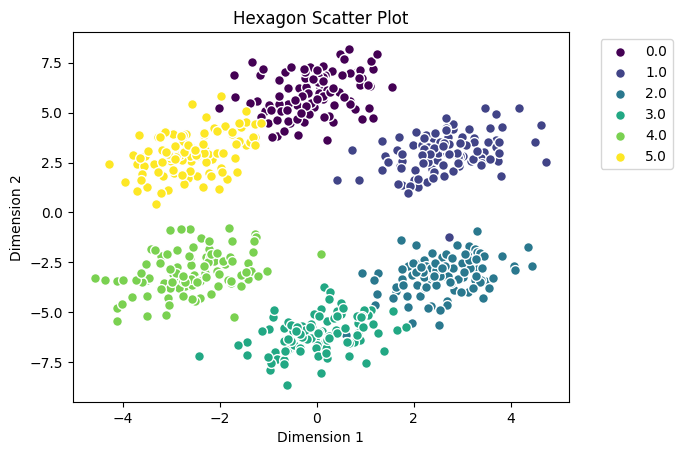

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
unique_colors = np.unique(hexagon[:, 2])
colors = plt.cm.get_cmap('viridis', len(unique_colors))

for i, color in enumerate(unique_colors):
    mask = hexagon[:, 2] == color
    ax.scatter(hexagon[mask, 0], hexagon[mask, 1], color=colors(i), edgecolors='w', s=50, label=f'{color}')

ax.set_title('Hexagon Scatter Plot')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [40]:
data_hex = pd.read_csv('../data/hexagon.csv').values[:, :2]
data_cube = pd.read_csv('../data/cube.csv').values[:, :3]

In [41]:
labels_hex = pd.read_csv('../data/hexagon.csv').values[:, -1]
labels_cube = pd.read_csv('../data/cube.csv').values[:, -1]

## Unikalne klasy w danych

In [42]:
unique_labels = np.unique(labels_hex)
print(unique_labels)


[0. 1. 2. 3. 4. 5.]


## Testowanie sieci z gaussowską funkcją sąsiedztwa 

### Modyfikowanie parametrem sigma

In [47]:
network_a = KohonenNetwork(M=4, N=4, input_dim=2, initial_sigma=0.8, sigma_decay=0.1, init_lr=0.1, decay_rate=1)

In [44]:
network_a.train(data_hex, num_epochs=300)

In [45]:
network_a.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_20719/1488607705.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


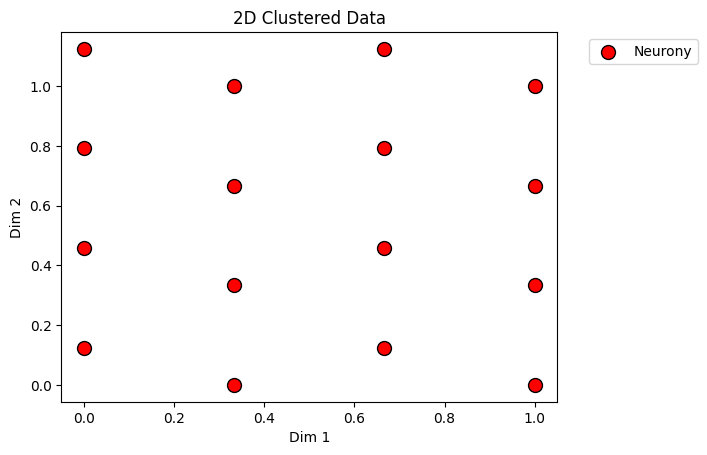

In [48]:
network_a.display_clustered_data(data_hex, view_data=False)

In [36]:
predicted_labels = np.array([network_a.bmu_cluster_map[network_a._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [16]:
v_measure_a = v_measure_score(labels_hex, predicted_labels)

In [17]:
v_measure_a

0.9057981824137421

In [426]:
network_b = KohonenNetwork(M=10, N=10, input_dim=2, initial_sigma=0.5, sigma_decay=1, init_lr=0.10, decay_rate=1)

In [158]:
network_b.train(data_hex, 100)

In [160]:
network_b.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_70412/2180918125.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


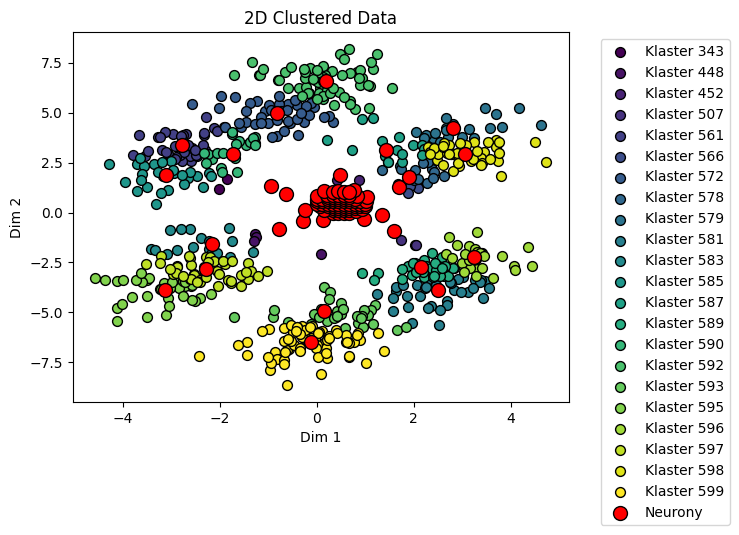

In [161]:
network_b.display_clustered_data(data_hex)

In [200]:
predicted_labels = np.array([network_b.bmu_cluster_map[network_b._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [201]:
v_measure_b = v_measure_score(labels_hex, predicted_labels)

In [202]:
v_measure_b

0.7269408725718116

In [162]:
network_c = KohonenNetwork(M=10, N=10, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.10, decay_rate=1)

In [163]:
network_c.train(data_hex, 10)

In [165]:
network_c.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_70412/2180918125.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


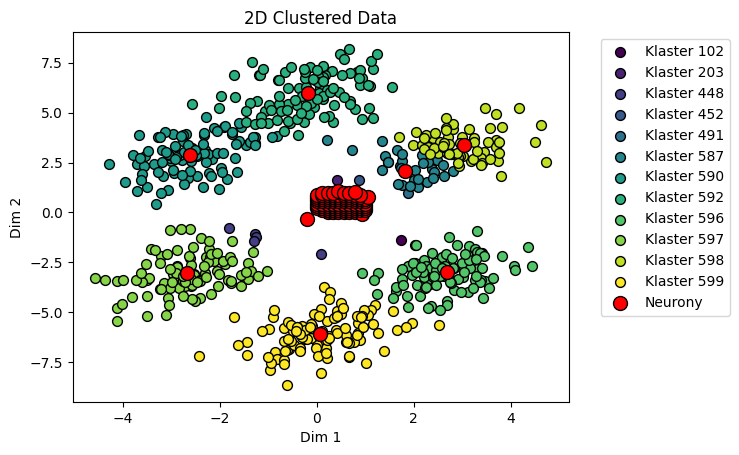

In [166]:
network_c.display_clustered_data(data_hex)

In [203]:
predicted_labels = np.array([network_c.bmu_cluster_map[network_c._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [204]:
v_measure_c = v_measure_score(labels_hex, predicted_labels)

In [205]:
v_measure_c

0.8969189146037936

### Sprawdzenie dla małego iloczynu MxN

In [167]:
network2 = KohonenNetwork(M=3, N=3, input_dim=2, initial_sigma=1.0, sigma_decay=0.1, init_lr=2, decay_rate=100)


In [168]:
network2.train(data_hex,  10)

In [170]:
network2.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_70412/2180918125.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


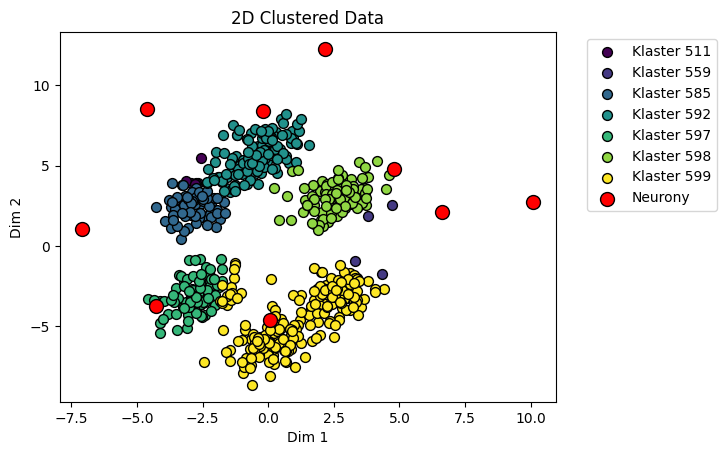

In [171]:
network2.display_clustered_data(data_hex)

In [206]:
predicted_labels = np.array([network2.bmu_cluster_map[network2._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [207]:
v_measure_2 = v_measure_score(labels_hex, predicted_labels)

In [208]:
v_measure_2

0.7812806997075241

## Testowanie sieci z funkcją sąsiedztwa minus druga pochodną funkcji gaussowskiej

### Modyfikowanie parametrem sigma

In [172]:
network_a = KohonenNetwork(M=10, N=10, input_dim=2, initial_sigma=1.0, sigma_decay=1, init_lr=0.10, decay_rate=1, neighborhood_function='mexican_hat')

In [173]:
network_a.train(data_hex, 10)

In [175]:
network_a.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_70412/2180918125.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


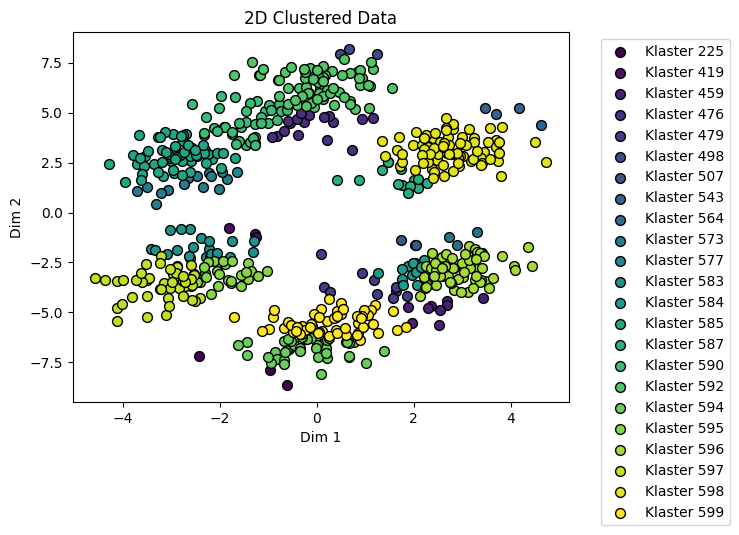

In [176]:
network_a.display_clustered_data(data_hex, neuron_positions=False)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_70412/2180918125.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


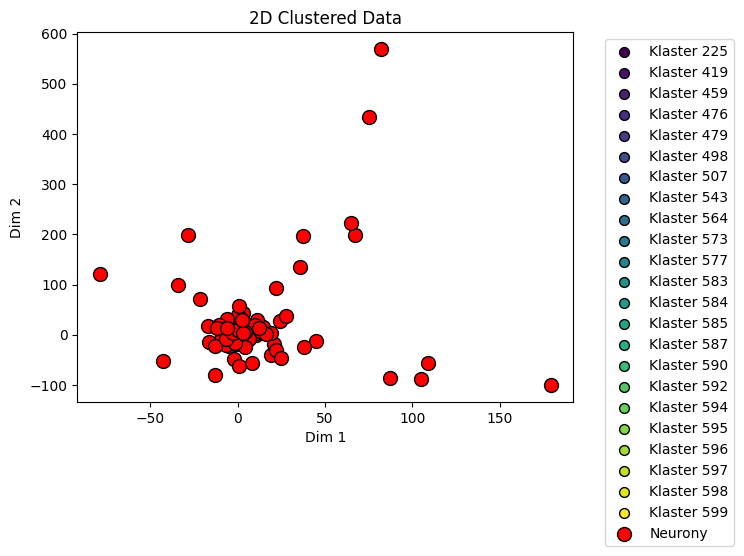

In [177]:
network_a.display_clustered_data(data_hex)

In [209]:
predicted_labels = np.array([network_a.bmu_cluster_map[network_c._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [210]:
v_measure_a = v_measure_score(labels_hex, predicted_labels)

In [211]:
v_measure_a

0.6467426657034409

In [178]:
network_b = KohonenNetwork(M=10, N=10, input_dim=2, initial_sigma=0.5, sigma_decay=1, init_lr=0.10, decay_rate=1, neighborhood_function='mexican_hat')

In [179]:
network_b.train(data_hex, 10)

In [181]:
network_b.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_70412/2180918125.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


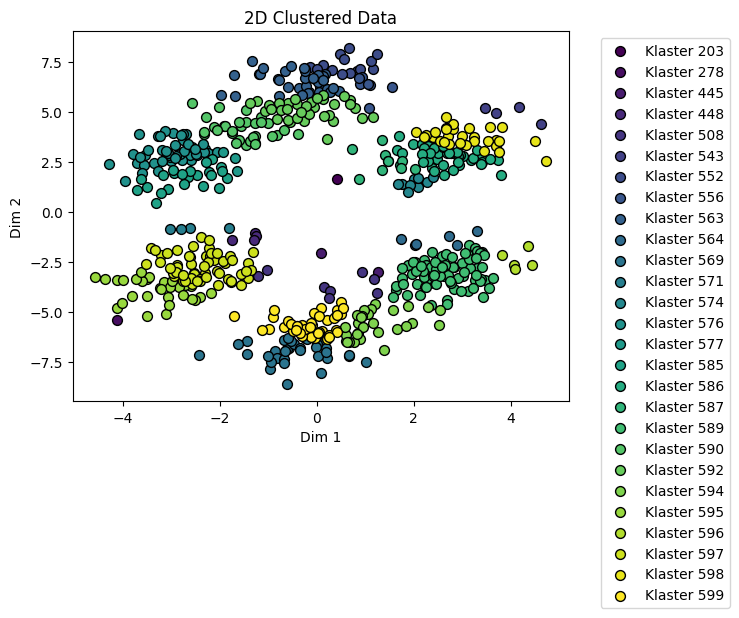

In [182]:
network_b.display_clustered_data(data_hex, neuron_positions=False)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_70412/2180918125.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


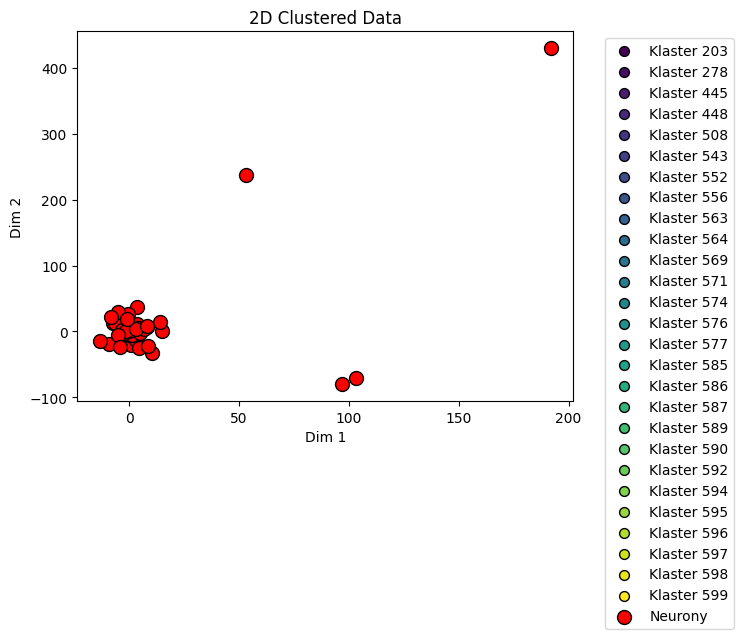

In [183]:
network_b.display_clustered_data(data_hex, neuron_positions=True)

In [212]:
predicted_labels = np.array([network_b.bmu_cluster_map[network_b._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [213]:
v_measure_b = v_measure_score(labels_hex, predicted_labels)

In [214]:
v_measure_b

0.7269408725718116

In [184]:
network_c = KohonenNetwork(M=10, N=10, input_dim=2, initial_sigma=0.1, sigma_decay=1, init_lr=0.10, decay_rate=1, neighborhood_function='mexican_hat')

In [185]:
network_c.train(data_hex, 10)

In [187]:
network_c.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_70412/2180918125.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


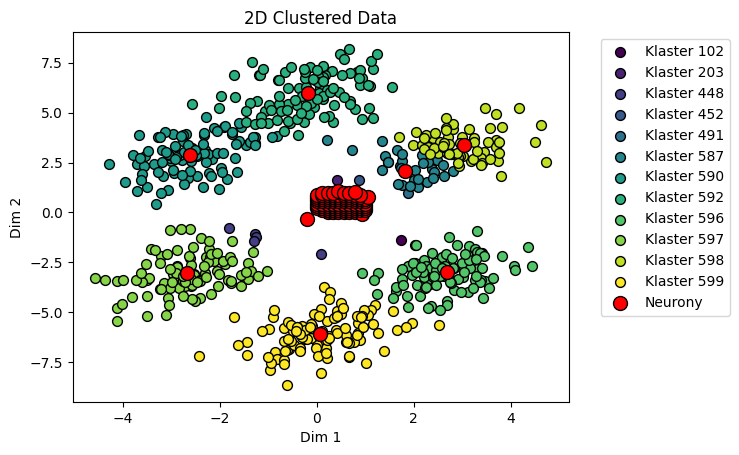

In [188]:
network_c.display_clustered_data(data_hex)

In [215]:
predicted_labels = np.array([network_c.bmu_cluster_map[network_c._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [216]:
v_measure_c = v_measure_score(labels_hex, predicted_labels)

In [217]:
v_measure_c

0.8969189146037936

### Sprawdzenie dla małego iloczynu MxN

In [189]:
network2 = KohonenNetwork(M=3, N=3, input_dim=2, initial_sigma=1.0, sigma_decay=0.1, init_lr=2, decay_rate=100, neighborhood_function='mexican_hat')


In [190]:
network2.train(data_hex, 10)

In [192]:
network2.assign_clusters(data_hex)

/var/folders/ry/kcmcwh_95_jgg3sg1zp_pp5m0000gn/T/ipykernel_70412/2180918125.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(distinct_clusters))


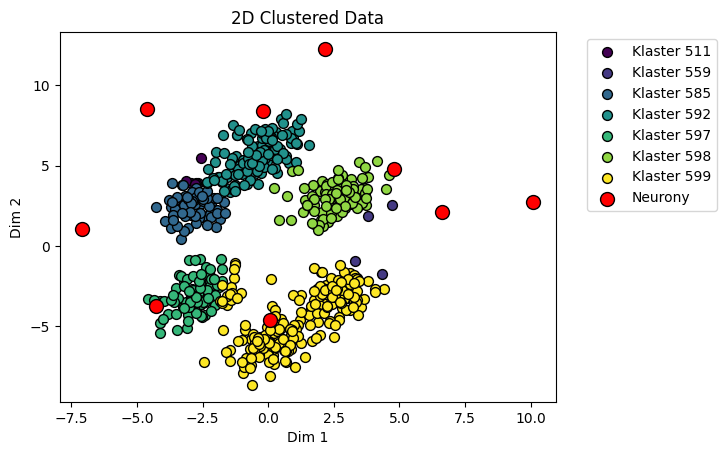

In [193]:
network2.display_clustered_data(data_hex)

In [218]:
predicted_labels = np.array([network2.bmu_cluster_map[network2._find_bmu_and_update_weights(sample, None, None)] for sample in data_hex])

In [219]:
v_measure_2 = v_measure_score(labels_hex, predicted_labels)

In [220]:
v_measure_2

0.7812806997075241